In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("Data Cleaning Contest Task.xlsx")
df

,PMID,Country
0,30916381,"Canada, Germany, USA"
1,18373710,USA
2,22540141,the Netherlands
3,22582760,USA
4,17635208,Sweden
...,...,...
10109,34172591,NaN
10110,25348259,NaN
10111,32081246,NaN
10112,26217423,NaN


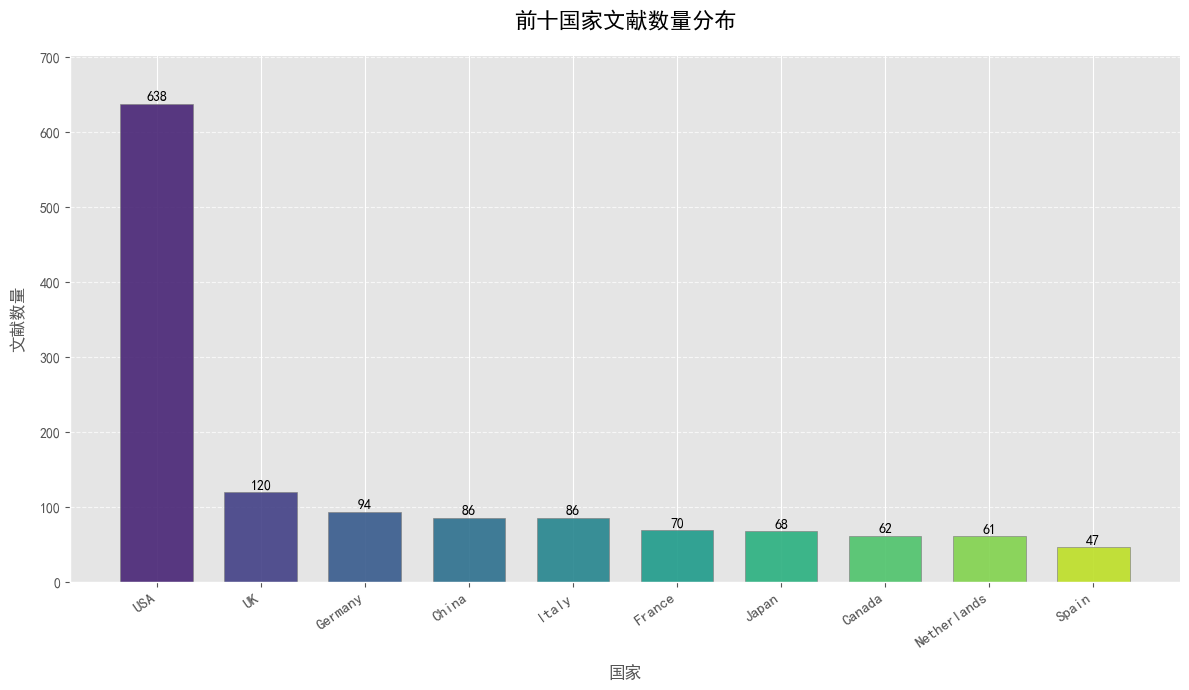

In [26]:
data = pd.read_excel("country.xlsx")

# 按文献数量降序排序并提取前十个国家
sorted_data = data.sort_values(by="文献数量", ascending=False)
top_ten = sorted_data.head(10)

# 设置中文字体支持
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 使用黑体支持中文
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 设置绘图风格
plt.style.use("ggplot")  # 使用ggplot风格

# 创建条形图
fig, ax = plt.subplots(figsize=(12, 7))

# 使用渐变色系
colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(top_ten)))

# 创建条形图
bars = ax.bar(
    top_ten["国家名称"],
    top_ten["文献数量"],
    color=colors,
    edgecolor="gray",
    alpha=0.9,
    width=0.7,
)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# 添加标题和轴标签
ax.set_title("前十国家文献数量分布", fontsize=16, fontweight="bold", pad=20)
ax.set_xlabel("国家", fontsize=12, labelpad=10)
ax.set_ylabel("文献数量", fontsize=12, labelpad=10)

# 旋转x轴标签以避免重叠
plt.xticks(rotation=35, ha="right", fontsize=11)
plt.yticks(fontsize=10)

# 添加网格线并只保留y轴
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# 调整y轴范围，增加顶部空间以容纳标签
y_max = max(top_ten["文献数量"]) * 1.1
ax.set_ylim(0, y_max)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [20]:
# 一共有多少唯一PMID
df["PMID"].nunique()

10113

In [21]:
# 统计有多少个PMID是有可能有country值的
df["Country"].notnull().sum()

np.int64(9671)

In [22]:
# 找出重复的PMID
df[df.duplicated("PMID")]

,PMID,Country
111,25265492,NaN


In [23]:
data["国家名称"].nunique()

107

In [28]:
import pandas as pd
import re

# Read the Excel file
df = pd.read_excel("Data Cleaning Contest Task.xlsx")

# Define country standardization mappings
country_mappings = {
    # 英语国家缩写及变体
    "UK": "United Kingdom",
    "U.K.": "United Kingdom",
    "England": "United Kingdom",
    "Scotland": "United Kingdom",
    "Wales": "United Kingdom",
    "Northern Ireland": "United Kingdom",
    "Great Britain": "United Kingdom",
    "Britain": "United Kingdom",
    "USA": "United States",
    "US": "United States",
    "U.S.": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",
    # 荷兰的不同表述
    "The Netherlands": "Netherlands",
    "the Netherlands": "Netherlands",
    "Nederland": "Netherlands",
    # 中国的不同表述
    "Republic of China": "China",
    "People's Republic of China": "China",
    "People's Republic of China": "China",
    "ROC": "China",
    "PR China": "China",
    "P.R. China": "China",
    "PRC": "China",
    "Mainland China": "China",
    "Hong Kong": "China",
    "Hong Kong SAR": "China",
    # 韩国的不同表述
    "Republic of Korea": "South Korea",
    "Korea": "South Korea",
    "South Korea": "South Korea",
    # 北韩
    "Democratic People's Republic of Korea": "North Korea",
    "North Korea": "North Korea",
    # 新加坡
    "Republic of Singapore": "Singapore",
    # 伊朗
    "Islamic Republic of Iran": "Iran",
    "IR Iran": "Iran",
    # 俄罗斯
    "Russian Federation": "Russia",
    # 台湾
    "Taiwan": "Taiwan",
    "Chinese Taipei": "Taiwan",
    # 德国
    "FRG": "Germany",
    "Federal Republic of Germany": "Germany",
    "Deutschland": "Germany",
    # 瑞士
    "CH": "Switzerland",
    # 墨西哥
    "México": "Mexico",
    # 南非
    "Republic of South Africa": "South Africa",
    # 日本
    "Nippon": "Japan",
    # 巴西
    "Brasil": "Brazil",
    # 土耳其
    "Turkiye": "Turkey",
    "Türkiye": "Turkey",
    # 捷克
    "Czech Republic": "Czechia",
    # 巴勒斯坦
    "Palestine": "State of Palestine",
    "Palestinian Territory": "State of Palestine",
    # 匈牙利
    "Magyar": "Hungary",
    # 国家名称错别字修正
    "Singaore": "Singapore",
    "Swizerland": "Switzerland",
    "Swizterland": "Switzerland",
    "Australlia": "Australia",
    "Portugual": "Portugal",
    "Isreal": "Israel",
    # 美国州/地区到美国的映射（常见缩写）
    "AL": "United States",
    "AK": "United States",
    "AZ": "United States",
    "AR": "United States",
    "CA": "United States",
    "CO": "United States",
    "CT": "United States",
    "DE": "United States",
    "FL": "United States",
    "GA": "United States",
    "HI": "United States",
    "ID": "United States",
    "IL": "United States",
    "IN": "United States",
    "IA": "United States",
    "KS": "United States",
    "KY": "United States",
    "LA": "United States",
    "ME": "United States",
    "MD": "United States",
    "MA": "United States",
    "MI": "United States",
    "MN": "United States",
    "MS": "United States",
    "MO": "United States",
    "MT": "United States",
    "NE": "United States",
    "NV": "United States",
    "NH": "United States",
    "NJ": "United States",
    "NM": "United States",
    "NY": "United States",
    "NC": "United States",
    "ND": "United States",
    "OH": "United States",
    "OK": "United States",
    "OR": "United States",
    "PA": "United States",
    "RI": "United States",
    "SC": "United States",
    "SD": "United States",
    "TN": "United States",
    "TX": "United States",
    "UT": "United States",
    "VT": "United States",
    "VA": "United States",
    "WA": "United States",
    "WV": "United States",
    "WI": "United States",
    "WY": "United States",
    "DC": "United States",
    # 美国一些常见城市和地区
    "California": "United States",
    "New York": "United States",
    "Boston": "United States",
    "Chicago": "United States",
    "Seattle": "United States",
    "Los Angeles": "United States",
    "San Francisco": "United States",
    "Washington": "United States",
    "Texas": "United States",
    "Florida": "United States",
    "Ohio": "United States",
    "Michigan": "United States",
    "Philadelphia": "United States",
    "Atlanta": "United States",
    "Dallas": "United States",
    "Houston": "United States",
    "Phoenix": "United States",
    "Portland": "United States",
    "San Diego": "United States",
    "Denver": "United States",
    "Minneapolis": "United States",
    "New Orleans": "United States",
    "Orlando": "United States",
    "Miami": "United States",
    "Charlotte": "United States",
    "Baltimore": "United States",
    # 加拿大省份
    "ON": "Canada",
    "QC": "Canada",
    "BC": "Canada",
    "AB": "Canada",
    "MB": "Canada",
    "SK": "Canada",
    "NS": "Canada",
    "NB": "Canada",
    "NL": "Canada",
    "PE": "Canada",
    "NT": "Canada",
    "YT": "Canada",
    "NU": "Canada",
    "Ontario": "Canada",
    "Quebec": "Canada",
    "British Columbia": "Canada",
    "Alberta": "Canada",
    "Manitoba": "Canada",
    "Saskatchewan": "Canada",
    "Nova Scotia": "Canada",
    "New Brunswick": "Canada",
    "Newfoundland": "Canada",
    "Prince Edward Island": "Canada",
    "Northwest Territories": "Canada",
    "Yukon": "Canada",
    "Nunavut": "Canada",
    # 澳大利亚州省
    "NSW": "Australia",
    "VIC": "Australia",
    "QLD": "Australia",
    "WA": "Australia",
    "SA": "Australia",
    "TAS": "Australia",
    "ACT": "Australia",
    "NT": "Australia",
    "New South Wales": "Australia",
    "Victoria": "Australia",
    "Queensland": "Australia",
    "Western Australia": "Australia",
    "South Australia": "Australia",
    "Tasmania": "Australia",
    "Australian Capital Territory": "Australia",
    "Northern Territory": "Australia",
    # 英国组成部分
    "London": "United Kingdom",
    "Manchester": "United Kingdom",
    "Birmingham": "United Kingdom",
    "Liverpool": "United Kingdom",
    "Glasgow": "United Kingdom",
    "Edinburgh": "United Kingdom",
    "Cardiff": "United Kingdom",
    "Belfast": "United Kingdom",
    "Cambridge": "United Kingdom",
    "Oxford": "United Kingdom",
    "Leeds": "United Kingdom",
    "Sheffield": "United Kingdom",
    "Bristol": "United Kingdom",
    "Newcastle": "United Kingdom",
    "Nottingham": "United Kingdom",
    "Leicester": "United Kingdom",
    "Southampton": "United Kingdom",
    "Derby": "United Kingdom",
}


# Function to clean and extract countries from a string
def extract_countries(text):
    if not isinstance(text, str):
        return []

    # Remove patterns that aren't countries (e.g., "and", email addresses, zip codes)
    text = re.sub(r"\s+and\s+$", "", text)
    text = re.sub(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}", "", text)
    text = re.sub(r"\b\d{5}(?:-\d{4})?\b", "", text)

    # Split by common separators
    parts = re.split(r",|\s+and\s+|;", text)

    # Process each part
    countries = []
    for part in parts:
        part = part.strip()
        if not part:
            continue

        # Apply mappings
        if part in country_mappings:
            countries.append(country_mappings[part])
        # Check if it's a US state code (handle these as USA)
        elif re.match(r"^[A-Z]{2}$", part) and part not in ["UK", "EU"]:
            countries.append("United States")
        # Otherwise use the original country name
        else:
            # Skip parts that are clearly not countries (institutions, cities, etc.)
            if any(
                indicator in part.lower()
                for indicator in [
                    "university",
                    "institute",
                    "hospital",
                    "medical center",
                ]
            ):
                continue
            countries.append(part)

    # Remove duplicates while preserving order
    seen = set()
    return [c for c in countries if not (c in seen or seen.add(c))]


# Process the data
result_data = []
for index, row in df.iterrows():
    pmid = row["PMID"]

    if pd.notna(row["Country"]):
        countries = extract_countries(row["Country"])

        # Add a row for each PMID-country pair
        for country in countries:
            result_data.append({"PMID": pmid, "country": country})

# Create the result DataFrame
result_df = pd.DataFrame(result_data)

# Remove duplicates
result_df = result_df.drop_duplicates()

# Count how many unique PMIDs have country values
pmids_with_country = result_df["PMID"].nunique()

# Display results
print(f"Data cleaning complete!")
print(f"Total PMID-country pairs: {len(result_df)}")
print(f"Number of PMIDs with country values: {pmids_with_country}")
print(f"Number of unique countries: {result_df['country'].nunique()}")

# Save the results
result_df.to_csv("cleaned_pmid_country.csv", index=False)
print("Results saved to 'cleaned_pmid_country.csv'")

# Display first few rows of the cleaned data
result_df.head(10)

Data cleaning complete!
Total PMID-country pairs: 14915
Number of PMIDs with country values: 9578
Number of unique countries: 850
Results saved to 'cleaned_pmid_country.csv'


,PMID,country
0,30916381,Canada
1,30916381,Germany
2,30916381,United States
3,18373710,United States
4,22540141,Netherlands
5,22582760,United States
6,17635208,Sweden
7,19220390,United States
8,20052455,United Kingdom
9,21455728,United Kingdom


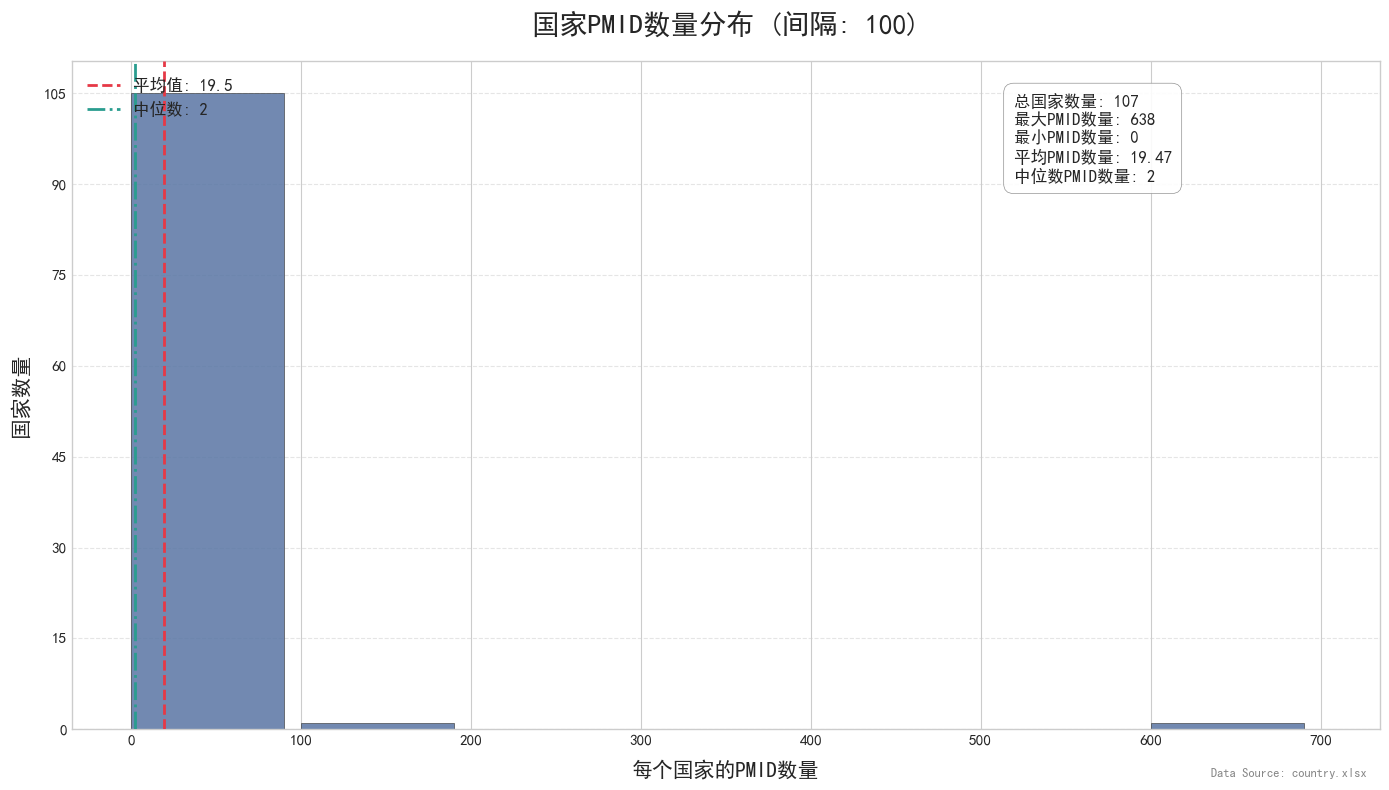

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 读取清洗后的数据
data = pd.read_excel("country.xlsx")
country_pmid_counts = data

# 计算统计信息
total_countries = len(country_pmid_counts)
max_pmids = country_pmid_counts["pmid_count"].max()
min_pmids = country_pmid_counts["pmid_count"].min()
mean_pmids = country_pmid_counts["pmid_count"].mean()
median_pmids = country_pmid_counts["pmid_count"].median()

# 设置样式
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 使用黑体支持中文显示
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 创建画布和子图
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# 设置直方图的bins
max_bin = max_pmids + 100 - (max_pmids % 100)
bins = np.arange(0, max_bin + 100, 100)

# 绘制直方图
n, bins_plot, patches = ax.hist(
    country_pmid_counts["pmid_count"],
    bins=bins,
    color="#5975a4",  # 优雅的蓝色
    edgecolor="#333333",  # 深灰色边框
    alpha=0.85,  # 透明度
    width=90,  # 柱宽
    zorder=2,
)  # 图层顺序

# 添加参考线
ax.axvline(
    x=mean_pmids,
    color="#e63946",
    linestyle="--",
    linewidth=2,
    label=f"平均值: {mean_pmids:.1f}",
    zorder=3,
)
ax.axvline(
    x=median_pmids,
    color="#2a9d8f",
    linestyle="-.",
    linewidth=2,
    label=f"中位数: {median_pmids:.0f}",
    zorder=3,
)

# 添加标题和标签
ax.set_title("国家PMID数量分布 (间隔: 100)", fontsize=20, fontweight="bold", pad=20)
ax.set_xlabel("每个国家的PMID数量", fontsize=15, labelpad=10)
ax.set_ylabel("国家数量", fontsize=15, labelpad=10)

# 设置刻度和网格线
step = 200 if max_pmids > 1000 else 100
ax.set_xticks(np.arange(0, max_bin + step, step))
ax.tick_params(axis="both", labelsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # y轴只显示整数

# 添加统计信息文本框
stats_text = (
    f"总国家数量: {total_countries}\n"
    f"最大PMID数量: {max_pmids:,}\n"  # 使用千位分隔符
    f"最小PMID数量: {min_pmids}\n"
    f"平均PMID数量: {mean_pmids:.2f}\n"
    f"中位数PMID数量: {median_pmids:.0f}"
)

text_box = dict(
    boxstyle="round,pad=0.6", facecolor="white", alpha=0.9, edgecolor="#888888"
)

ax.text(0.72, 0.82, stats_text, transform=ax.transAxes, bbox=text_box, fontsize=12)

# 添加图例
ax.legend(loc="upper left", fontsize=12, framealpha=0.9)

# 添加数据来源
fig.text(
    0.98,
    0.02,
    "Data Source: country.xlsx",
    ha="right",
    va="bottom",
    fontsize=9,
    color="#888888",
    style="italic",
)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()